# Gradient Boosting 


##### Boosting is an ensemble technique in which the predictors are not made independently, but sequentially.


Gradient boosting algorithm is one of the most powerful algorithms in the field of machine learning. As we know that the errors in machine learning algorithms are broadly classified into two categories i.e. Bias Error and Variance Error. As gradient boosting is one of the boosting algorithms it is used to minimize bias error of the model.


Gradient boosting algorithm can be used for predicting not only continuous target variable (as a Regressor) but also categorical target variable (as a Classifier). When it is used as a regressor, the cost function is Mean Square Error (MSE) and when it is used as a classifier then the cost function is Log loss.





This technique employs the logic in which the subsequent predictors learn from the mistakes of the previous predictors. Therefore, the observations have an unequal probability of appearing in subsequent models and ones with the highest error appear most. (So the observations are not chosen based on the bootstrap process, but based on the error). The predictors can be chosen from a range of models like decision trees, regressors, classifiers etc. Because new predictors are learning from mistakes committed by previous predictors, it takes less time/iterations to reach close to actual predictions. But we have to choose the stopping criteria carefully or it could lead to overfitting on training data. 

##### In summary,
• We first model data with simple models and analyze data for errors.

• These errors signify data points that are difficult to fit by a simple model.

• Then for later models, we particularly focus on those hard to fit data to get them right.

• In the end, we combine all the predictors by giving some weights to each predictor.

### The Algorithm 
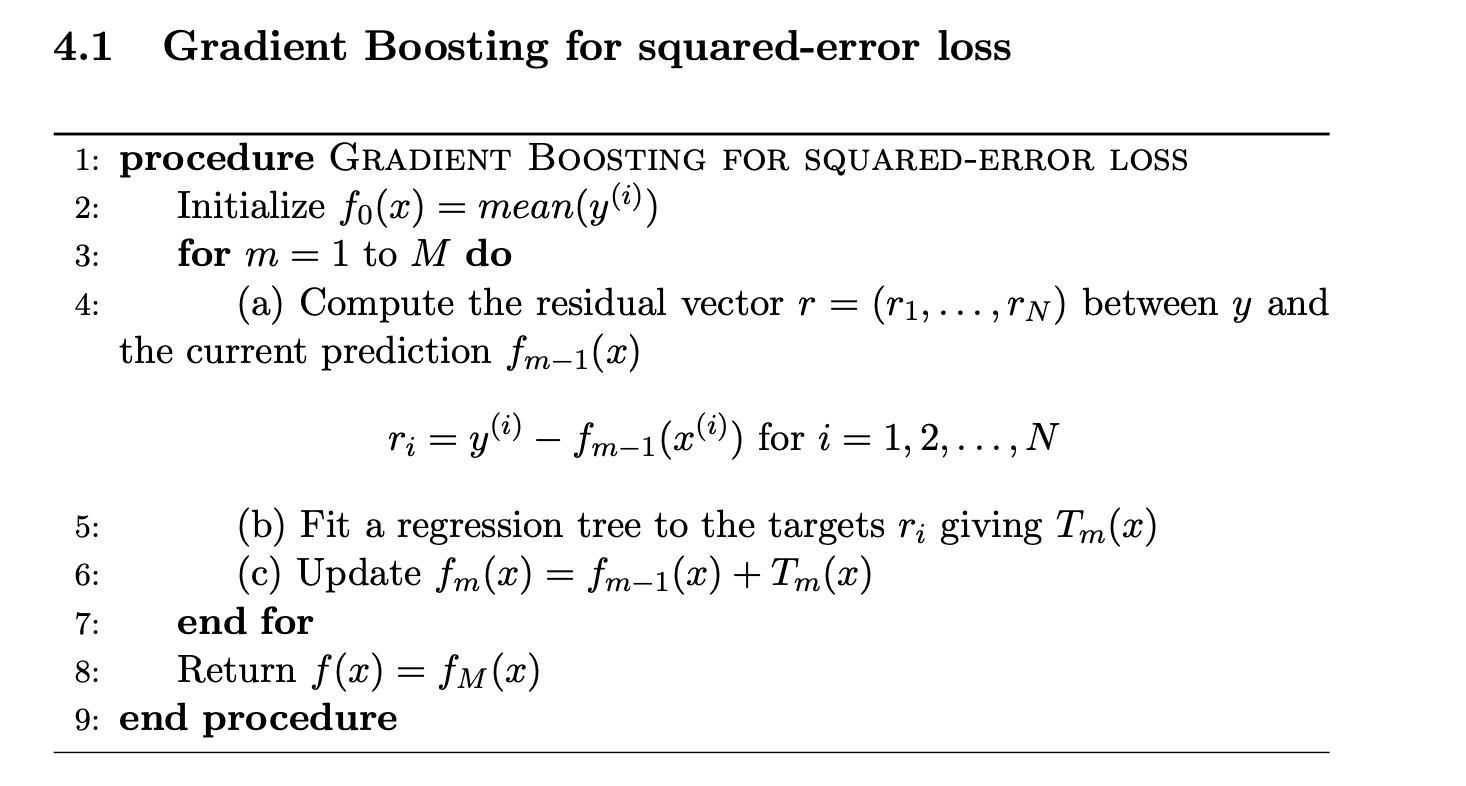

#### Steps
1.  Initialize the first prediction as as mean of the actual values 
2.  Loop through the number of estimators  
3.  Fit a simple linear regressor or decision tree on data like decision tree. 
4.  Calculate error residuals. Actual target value, minus predicted target value [e1= y - y_predicted1 ]
5. Fit a new model on error residuals as target variable with same input variables [call it e1_predicted]
6. Add the predicted residuals to the previous predictions [y_predicted2 = y_predicted1 + e1_predicted]
7. Fit another model on residuals that is still left. i.e. [e2 = y - y_predicted2] and repeat steps 2 to 5 until it starts overfitting or the sum of residuals become constant. Overfitting can be controlled by consistently checking accuracy on validation data.



In [248]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


In [249]:
class GradientBoosting:
    
    def __init__(self, max_iter=5, max_depth=1, nu=0.1):
        self.max_depth = max_depth
        self.nu = nu 
        self.max_iter = max_iter
        self.y_mean = np.mean(y)
        self.trees = []
        
    def fit(self,X, y):
        """
        Prams: X and y from the training set
        returns: trained trees 
        
        Description: 
        - initialize mean of y as first prediction, loop over multiple iterations
        - compute the residuals
        - train trees from the residuals
        - make predictions of residuals penalized by learning rate nu
        - update the predctions by adding to the previous predictions 
        - then compute the residuals again by the updated predctions until all iters are done 
        - train the trees by the updated predictions  

        """
#         print(self.y_mean )
        fm = self.y_mean 
        self.trees = []
        for m in range(self.max_iter):
            residuals = y - fm 
            dt = DecisionTreeRegressor(max_depth= self.max_depth)
            dt.fit(X, residuals)
            
            y_pred = dt.predict(X) * self.nu
            fm = fm + y_pred
            self.trees.append(dt)
            
#         return y_mean, trees 
    
    def predict(self, X):
        
            y_hat = self.y_mean
            
            for tree in self.trees:
                y_hat = y_hat + (tree.predict(X) * self.nu)
                
            return y_hat 
        
            
        
        
        

In [250]:
import numpy as np
from sklearn.datasets import \
    load_boston, load_iris, load_diabetes, load_wine, \
    load_breast_cancer, fetch_california_housing
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
import inspect

In [251]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=0.20)

In [252]:
gbm = GradientBoosting(max_iter=100, max_depth = 2)
gbm.fit(X_train, y_train)

In [253]:
y_pred = gbm.predict(X_test)

In [254]:
# Fit model
from sklearn.metrics import explained_variance_score


print('The ROC-AUC score of the model is:', round(explained_variance_score(y_test, y_pred, multioutput='uniform_average'), 4))

The ROC-AUC score of the model is: 0.8723


In [255]:
r2_score(y_test, y_pred)

0.8712700124916254

In [256]:
x = np.random.randint(5, 5)
mean = np.mean(x)

std = np.std(x)

z = (x - mean)/std 






ValueError: low >= high

In [276]:
x = np.arange(1,10).reshape(3,3)
x

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [278]:
x_bar = np.mean(x, axis=1)
x_bar

array([2., 5., 8.])

In [279]:
std = np.std(x)
z = (x - x_bar)/std